In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier

In [40]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [41]:
import re

Read listings.csv

In [42]:
Data = pd.read_csv("/content/listings.csv")

In [43]:
Data.head()

,id,source,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,44077,city scrape,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,193005,Teresa,2010-08-06,"Dublin, Ireland","I am a friendly outgoing Irishwoman ,who love...",...,31,4.78,4.83,4.74,4.93,4.93,4.66,4.82,f,1.85
1,85156,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",193005,Teresa,2010-08-06,"Dublin, Ireland","I am a friendly outgoing Irishwoman ,who love...",...,28,4.79,4.86,4.74,4.90,4.88,4.64,4.78,f,1.53
2,159889,city scrape,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,766611,Margaret,2011-07-01,"Dublin, Ireland",Used to host students and now I am looking fo...,...,44,4.74,4.77,4.71,4.86,4.90,4.63,4.74,f,2.78
3,162809,city scrape,5.5 miles south of Dublin City :^),A nice place to relax after the bustle of the ...,"Close to the sea, hill walks and the city - vi...",777681,Robbie,2011-07-04,"Dublin, Ireland",I live here on the third floor of my house. Th...,...,41,4.84,4.88,4.85,4.95,4.97,4.77,4.85,f,3.68
4,165828,city scrape,Pádraig Pearse apt. Kilmainham,"Don't just visit Dublin, experience Dublin in ...","Enjoy a walk along the grand canal, or just ob...",790601,Grainne,2011-07-07,Ireland,"I'm Gráinne, originally from Co. Kildare and r...",...,17,4.63,4.89,4.69,4.81,4.75,4.34,4.55,t,0.48


Read review.csv files. Since the original file was too big to read, I split the file into 6 files

In [44]:
review1 = pd.read_csv("/content/review1.csv")
review2 = pd.read_csv("/content/review2.csv")
review3 = pd.read_csv("/content/review3.csv")
review4 = pd.read_csv("/content/review4.csv")
review5 = pd.read_csv("/content/review5.csv")
review6 = pd.read_csv("/content/review6.csv")

In [45]:
df = [review1, review2, review3, review4, review5, review6]
reviews = pd.concat(df)
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,44077.0,203703.0,2011/03/20,393348,Christian,We enjoyed our stay very much. The room was co...
1,44077.0,211369.0,2011/03/28,444004,Solidea,We have been here 4 nights. Stay in a home is ...
2,44077.0,234215.0,2011/04/21,465058,Michael And Isabelle,Teresa and Hughie were great hosts. They were ...
3,44077.0,261843.0,2011/05/13,490005,Weston,"No surprises, was as described. Very gracious..."
4,44077.0,268148.0,2011/05/17,520460,Barbara,"Teresa was a lovely hostess, and we had a deli..."


If you can read the review.csv file without splitting, run these cells

In [ ]:
df = pd.read_csv("/content/review.csv")
reviews = pd.concat(df)
reviews.head()

In [46]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7566 entries, 0 to 7565
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           7566 non-null   int64  
 1   source                       7566 non-null   object 
 2   name                         7566 non-null   object 
 3   description                  7411 non-null   object 
 4   neighborhood_overview        4194 non-null   object 
 5   host_id                      7566 non-null   int64  
 6   host_name                    7566 non-null   object 
 7   host_since                   7566 non-null   object 
 8   host_location                6232 non-null   object 
 9   host_about                   3556 non-null   object 
 10  host_response_time           3932 non-null   object 
 11  host_response_rate           3932 non-null   object 
 12  host_acceptance_rate         4191 non-null   object 
 13  host_is_superhost 

In [10]:
Data.columns

Index(['id', 'source', 'name', 'description', 'neighborhood_overview',
       'host_id', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'n_amenities',
       'price', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month'],
      dtype='object')

In [47]:
Data.drop("source", axis = 1, inplace = True)
Data.drop("name", axis = 1, inplace = True)
Data.drop("description", axis = 1, inplace = True)
Data.drop("neighborhood_overview", axis = 1, inplace = True)
Data.drop("host_id", axis = 1, inplace = True)
Data.drop("host_about", axis = 1, inplace = True)
Data.drop("host_name", axis = 1, inplace = True)
Data.drop("host_since", axis = 1, inplace = True)
Data.drop("host_location", axis = 1, inplace = True)

In [48]:
Data.drop("host_neighbourhood", axis = 1, inplace = True)
Data.drop("host_listings_count", axis = 1, inplace = True)
Data.drop("host_total_listings_count", axis = 1, inplace = True)
Data.drop("neighbourhood", axis = 1, inplace = True)
Data.drop("neighbourhood_cleansed", axis = 1, inplace = True)
Data.drop("property_type", axis = 1, inplace = True)
Data.drop("room_type", axis = 1, inplace = True)
Data.drop("bathrooms_text", axis = 1, inplace = True)
Data.drop("host_acceptance_rate", axis = 1, inplace = True)
Data.drop("instant_bookable", axis = 1, inplace = True)
Data.drop("host_verifications", axis = 1, inplace = True)
Data.drop("amenities", axis = 1, inplace = True)

In [49]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243183 entries, 0 to 42285
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   listing_id     243183 non-null  float64
 1   id             243183 non-null  float64
 2   date           243183 non-null  object 
 3   reviewer_id    243183 non-null  int64  
 4   reviewer_name  243183 non-null  object 
 5   comments       243165 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 13.0+ MB


In [50]:
reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [51]:
reviews.drop("id", axis = 1, inplace = True)
reviews.drop("date", axis = 1, inplace = True)
reviews.drop("reviewer_id", axis = 1, inplace = True)
reviews.drop("reviewer_name", axis = 1, inplace = True)

In [52]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243183 entries, 0 to 42285
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   listing_id  243183 non-null  float64
 1   comments    243165 non-null  object 
dtypes: float64(1), object(1)
memory usage: 5.6+ MB


In [53]:
reviews['listing_id'] = reviews.listing_id.astype('int')

In [54]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243183 entries, 0 to 42285
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  243183 non-null  int64 
 1   comments    243165 non-null  object
dtypes: int64(1), object(1)
memory usage: 5.6+ MB


Remove nan

In [56]:
reviews = reviews[reviews['comments'].notna()]

Sentiment Analysis

In [57]:
!pip install langdetect

In [58]:
def sentiment_analysis(data, x, new_column):
    data[new_column] = 0
    sentiment = SentimentIntensityAnalyzer()

    for i in range(len(data)):
        s = str(data.iloc[i, data.columns.get_loc(x)])

        sentiment_value = sentiment.polarity_scores(s)
        data.iloc[i, data.columns.get_loc(new_column)] = sentiment_value["compound"]

In [59]:
sentiment_analysis(reviews, 'comments', 'sentiment_score')

<ipython-input-58-a7e5c1a6199a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[new_column] = 0


In [60]:
reviews.head(100)

,listing_id,comments,sentiment_score
0,44077,We enjoyed our stay very much. The room was co...,0.9513
1,44077,We have been here 4 nights. Stay in a home is ...,0.9842
2,44077,Teresa and Hughie were great hosts. They were ...,0.9836
3,44077,"No surprises, was as described. Very gracious...",0.9447
4,44077,"Teresa was a lovely hostess, and we had a deli...",0.9835
...,...,...,...
95,44077,What a charming place and a charming caring ho...,0.9324
96,44077,Le quartier calme et r√©sidentiel est tr√®s bi...,0.0000
97,44077,"Trato exquisito. Nos sentimos como en casa, mu...",0.0000
98,44077,Teresa and her husband made this a truly wonde...,0.9817


In [61]:
reviews.drop("comments", axis = 1, inplace = True)

<ipython-input-61-6b02681bc572>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews.drop("comments", axis = 1, inplace = True)


In [62]:
new_reviews = reviews

In [63]:
new_reviews = new_reviews.set_index('listing_id')

In [64]:
new_reviews

,sentiment_score
listing_id,
44077,0.9513
44077,0.9842
44077,0.9836
44077,0.9447
44077,0.9835
...,...
707685000000000000,0.9943
707825000000000000,0.4939
708680000000000000,0.9657


In [65]:
new_reviews = new_reviews.groupby(level = 'listing_id').mean()
new_reviews

,sentiment_score
listing_id,
44077,0.745622
85156,0.737112
159889,0.730886
162809,0.740887
165828,0.592037
...,...
707685000000000000,0.994300
707825000000000000,0.493900
708680000000000000,0.965700


In [66]:
new_Data = Data.set_index('id')
new_Data

,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,n_amenities,price,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,
44077,within an hour,100%,t,t,t,2,1.0,2.0,50,70.00,258,31,4.78,4.83,4.74,4.93,4.93,4.66,4.82,1.85
85156,within an hour,100%,t,t,t,2,1.0,1.0,35,67.00,210,28,4.79,4.86,4.74,4.90,4.88,4.64,4.78,1.53
159889,within an hour,100%,f,t,t,1,1.0,1.0,27,45.00,355,44,4.74,4.77,4.71,4.86,4.90,4.63,4.74,2.78
162809,within an hour,92%,t,t,t,6,2.0,4.0,48,80.00,326,41,4.84,4.88,4.85,4.95,4.97,4.77,4.85,3.68
165828,within an hour,100%,f,t,t,5,1.0,3.0,26,251.00,64,17,4.63,4.89,4.69,4.81,4.75,4.34,4.55,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712909401324393615,NaN,NaN,f,t,t,2,1.0,1.0,9,200.00,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
712914322433199115,within an hour,100%,f,t,f,1,1.0,1.0,5,48.00,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
712914393022526732,within a few hours,100%,f,t,t,2,2.0,2.0,32,64.00,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
Total = pd.merge(new_Data, new_reviews, left_index = True, right_index = True)

In [68]:
Total

,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,n_amenities,price,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,sentiment_score
44077,within an hour,100%,t,t,t,2,1.0,2.0,50,70.00,...,31,4.78,4.83,4.74,4.93,4.93,4.66,4.82,1.85,0.745622
85156,within an hour,100%,t,t,t,2,1.0,1.0,35,67.00,...,28,4.79,4.86,4.74,4.90,4.88,4.64,4.78,1.53,0.737112
159889,within an hour,100%,f,t,t,1,1.0,1.0,27,45.00,...,44,4.74,4.77,4.71,4.86,4.90,4.63,4.74,2.78,0.730886
162809,within an hour,92%,t,t,t,6,2.0,4.0,48,80.00,...,41,4.84,4.88,4.85,4.95,4.97,4.77,4.85,3.68,0.740887
165828,within an hour,100%,f,t,t,5,1.0,3.0,26,251.00,...,17,4.63,4.89,4.69,4.81,4.75,4.34,4.55,0.48,0.592037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54350199,a few days or more,43%,f,t,t,2,1.0,1.0,45,100.00,...,2,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.26,0.860550
54372393,within an hour,100%,f,t,t,4,2.0,2.0,26,236.00,...,9,3.67,3.67,4.33,3.44,3.78,4.67,3.67,1.88,0.314911
54394467,within an hour,100%,t,t,t,2,1.0,1.0,21,137.00,...,21,4.86,4.90,5.00,4.76,4.90,4.81,4.67,3.56,0.734886
54394539,within an hour,100%,t,t,t,2,1.0,1.0,16,150.00,...,13,4.77,5.00,5.00,4.92,4.85,4.62,4.62,2.31,0.801385


In [70]:
new_reviews.head()

,sentiment_score
listing_id,
44077,0.745622
85156,0.737112
159889,0.730886
162809,0.740887
165828,0.592037


In [69]:
#new_reviews.drop('comments', axis = 1, inplace = True)

KeyError: ignored

In [71]:
Total.to_csv("total.csv")

In [72]:
Total.columns

Index(['host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bedrooms', 'beds', 'n_amenities', 'price', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'sentiment_score'],
      dtype='object')

In [74]:
Total = pd.read_csv('total.csv')

In [73]:
Total.head()

,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,n_amenities,price,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,sentiment_score
44077,within an hour,100%,t,t,t,2,1.0,2.0,50,70.00,...,31,4.78,4.83,4.74,4.93,4.93,4.66,4.82,1.85,0.745622
85156,within an hour,100%,t,t,t,2,1.0,1.0,35,67.00,...,28,4.79,4.86,4.74,4.90,4.88,4.64,4.78,1.53,0.737112
159889,within an hour,100%,f,t,t,1,1.0,1.0,27,45.00,...,44,4.74,4.77,4.71,4.86,4.90,4.63,4.74,2.78,0.730886
162809,within an hour,92%,t,t,t,6,2.0,4.0,48,80.00,...,41,4.84,4.88,4.85,4.95,4.97,4.77,4.85,3.68,0.740887
165828,within an hour,100%,f,t,t,5,1.0,3.0,26,251.00,...,17,4.63,4.89,4.69,4.81,4.75,4.34,4.55,0.48,0.592037


Define the function to convert non-numeric data into numeric data

In [80]:
def boolean(x):
  if x == 'f':
    return -1
  return 1

def host_response(x):
  if x == 'within an hour':
    return 10
  elif x == 'within a few hours':
    return 8
  elif x == 'within a day':
    return 6
  else:
    return 4

def fillnamode(x):
  Total.loc[:, x] = Total.loc[:, x].fillna(Total.loc[:, x].value_counts().index[0])
  return

def fillnamean(x):
  Total.loc[:, x] = Total.loc[:, x].fillna(Total.loc[:, x].mean())
  return

In [81]:
for i in range(len(Total)):
    Total.iloc[i, Total.columns.get_loc('price')] = float(str(Total.iloc[i, Total.columns.get_loc('price')]).replace("$", "").replace(",", ""))
for i in range(len(Total)):
    Total.iloc[i, Total.columns.get_loc('host_response_rate')] = float(str(Total.iloc[i, Total.columns.get_loc('host_response_rate')]).strip("%"))/100

In [82]:
fillnamean('review_scores_accuracy')
fillnamean('review_scores_cleanliness')
fillnamean('review_scores_checkin')
fillnamean('review_scores_communication')
fillnamean('review_scores_location')
fillnamean('review_scores_value')
fillnamean('bedrooms')
fillnamean('beds')

fillnamode('host_response_time')

In [83]:
Total["host_is_superhost"] = Total['host_is_superhost'].map(boolean)
Total['host_has_profile_pic'] = Total['host_has_profile_pic'].map(boolean)
Total['host_identity_verified'] = Total['host_identity_verified'].map(boolean)
Total['host_response_time'] = Total['host_response_time'].map(host_response)

In [84]:
super = Total['host_is_superhost']
profile = Total['host_has_profile_pic']
identity = Total['host_identity_verified']
rating = Total['review_scores_value']
response = Total['host_response_time']
amenity = Total['n_amenities']
num_review = Total['number_of_reviews']
sentiment = Total['sentiment_score']
price = Total['price']

In [85]:
mean_price = price.mean()
std_price = price.std()
normal_price = (price - mean_price)/std_price
Total['price'] = (Total['price'] - mean_price)/std_price

In [86]:
print((profile < 0).sum())
print((profile > 0).sum())
print((identity < 0).sum())
print((identity > 0).sum())

27
5153
1208
3972


Text(0, 0.5, 'reveiw score value')

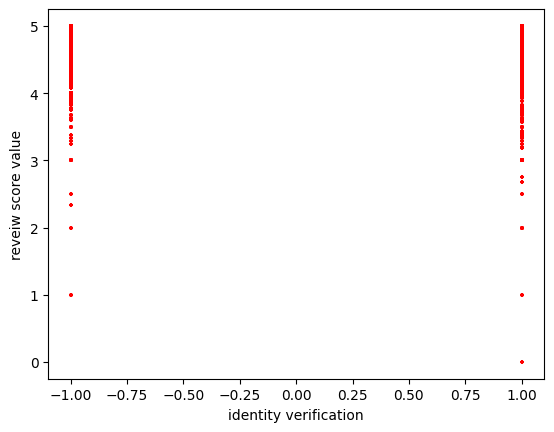

In [87]:
plt.scatter(identity, rating, marker = '+', s = 10, c = 'red')
plt.xlabel("identity verification")
plt.ylabel("reveiw score value")

Text(0, 0.5, 'reveiw score value')

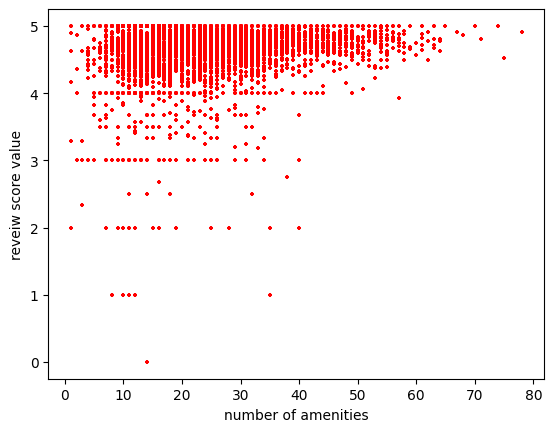

In [88]:
plt.scatter(amenity, rating, marker = '+', s = 10, c = 'red')
plt.xlabel("number of amenities")
plt.ylabel("reveiw score value")

Text(0, 0.5, 'reveiw score value')

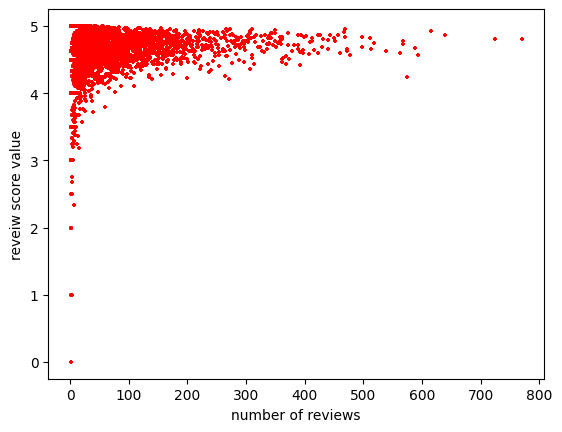

In [89]:
plt.scatter(num_review, rating, marker = '+', s = 10 , c = 'red')
plt.xlabel("number of reviews")
plt.ylabel("reveiw score value")

Text(0, 0.5, 'reveiw score value')

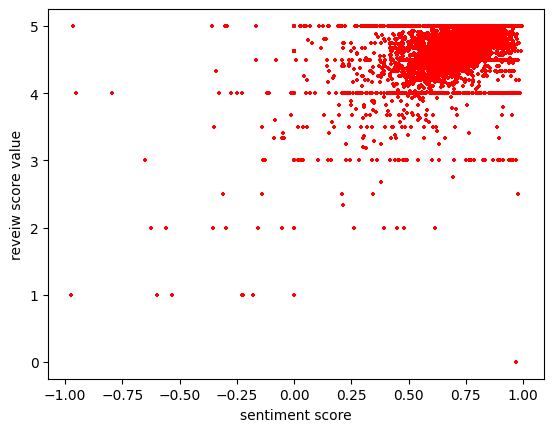

In [90]:
plt.scatter(sentiment, rating, marker = '+', s = 10, c = 'red')
plt.xlabel("sentiment score")
plt.ylabel("reveiw score value")

Text(0, 0.5, 'reveiw score value')

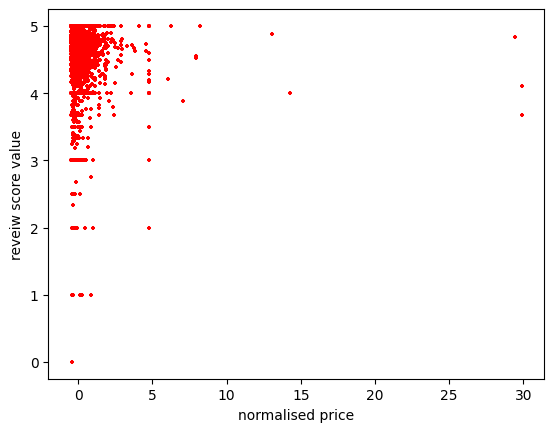

In [91]:
plt.scatter(normal_price, rating,  marker = '+', s = 10, c = 'red')
plt.xlabel("normalised price")
plt.ylabel("reveiw score value")

Text(0, 0.5, 'reveiw score value')

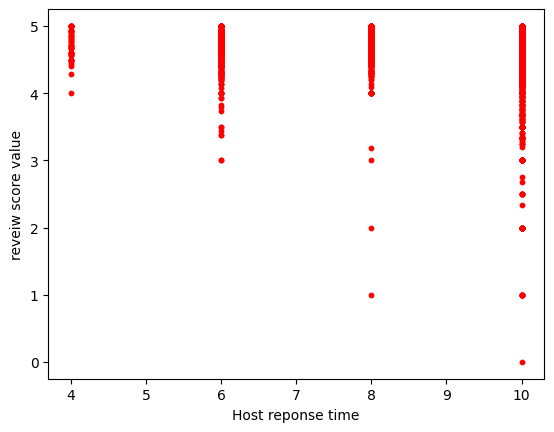

In [92]:
plt.scatter(response, rating, s = 10, c = 'red')
plt.xlabel("Host reponse time")
plt.ylabel("reveiw score value")

In [93]:
Total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5180 entries, 0 to 5179
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   5180 non-null   int64  
 1   host_response_time           5180 non-null   int64  
 2   host_response_rate           2352 non-null   object 
 3   host_is_superhost            5180 non-null   int64  
 4   host_has_profile_pic         5180 non-null   int64  
 5   host_identity_verified       5180 non-null   int64  
 6   accommodates                 5180 non-null   int64  
 7   bedrooms                     5180 non-null   float64
 8   beds                         5180 non-null   float64
 9   n_amenities                  5180 non-null   int64  
 10  price                        5180 non-null   object 
 11  number_of_reviews            5180 non-null   int64  
 12  number_of_reviews_ltm        5180 non-null   int64  
 13  review_scores_rati

In [94]:
Total.drop('host_response_rate', axis = 1, inplace = True)

In [95]:
New = Total

In [96]:
pd.isnull(New).sum()

Unnamed: 0                     0
host_response_time             0
host_is_superhost              0
host_has_profile_pic           0
host_identity_verified         0
accommodates                   0
bedrooms                       0
beds                           0
n_amenities                    0
price                          0
number_of_reviews              0
number_of_reviews_ltm          0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
sentiment_score                0
dtype: int64

In [97]:
Total.columns

Index(['Unnamed: 0', 'host_response_time', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bedrooms', 'beds', 'n_amenities', 'price', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'sentiment_score'],
      dtype='object')

In [98]:
label1 = [1, 2, 3, 4, 5]
label2 = [1, 2, 3, 4]
label3 = [1, 2, 3, 4, 5, 6]

In [99]:
def bin_scores(data, bin, score, labels):
    data[bin] = pd.qcut(data[score], q=6, duplicates='drop', labels = labels)

In [100]:
Total.columns

Index(['Unnamed: 0', 'host_response_time', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bedrooms', 'beds', 'n_amenities', 'price', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'sentiment_score'],
      dtype='object')

In [101]:
bin_scores(Total,'rating','review_scores_rating',label1)
bin_scores(Total,'accuracy','review_scores_accuracy',label1)
bin_scores(Total,'cleanliness','review_scores_cleanliness',label1)
bin_scores(Total,'checkin','review_scores_checkin',label2)
bin_scores(Total,'communication','review_scores_communication',label2)
bin_scores(Total,'location','review_scores_location',label1)
bin_scores(Total,'value','review_scores_value',label3)

In [102]:
target = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
new_target = ['rating', 'accuracy', 'cleanliness', 'checkin', 'communication', 'location', 'value']

Total = Total.drop(columns = target)
Total.head()

,Unnamed: 0,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,n_amenities,price,...,number_of_reviews_ltm,reviews_per_month,sentiment_score,rating,accuracy,cleanliness,checkin,communication,location,value
0,44077,10,1,1,1,2,1.0,2.0,50,-0.303875,...,31,1.85,0.745622,3,3,3,3,3,2,5
1,85156,10,1,1,1,2,1.0,1.0,35,-0.314066,...,28,1.53,0.737112,3,3,3,3,2,2,4
2,159889,10,-1,1,1,1,1.0,1.0,27,-0.388803,...,44,2.78,0.730886,3,2,3,2,3,2,4
3,162809,10,1,1,1,6,2.0,4.0,48,-0.269903,...,41,3.68,0.740887,4,3,4,4,4,3,5
4,165828,10,-1,1,1,5,1.0,3.0,26,0.311008,...,17,0.48,0.592037,2,3,3,2,1,1,2


In [103]:
correlation = Total.corr()

<ipython-input-103-5cd6e4a43de5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = Total.corr()


Text(120.5815972222222, 0.5, 'Name of features')

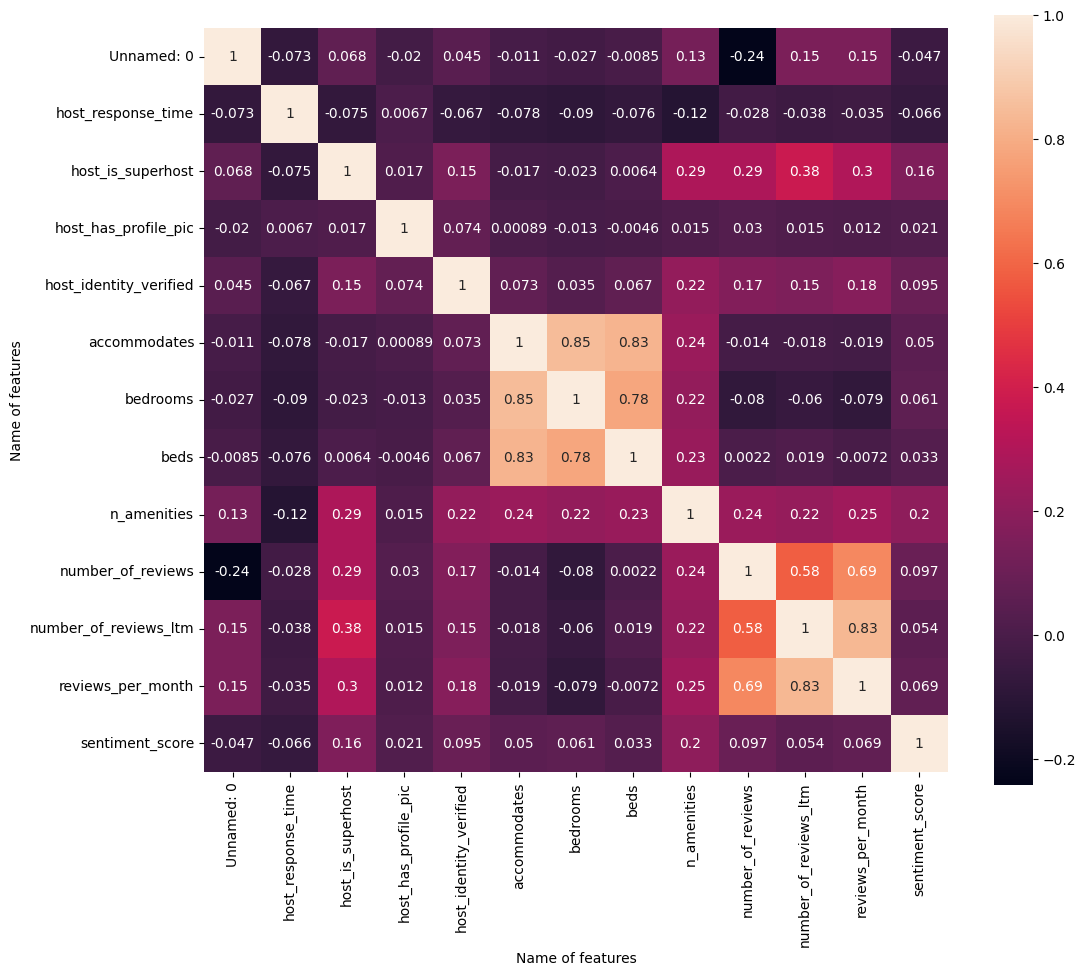

In [104]:
fig, ax = plt.subplots(figsize = (12, 10))
sns.heatmap(correlation, square = True, annot = True, xticklabels = correlation.columns.values, yticklabels = correlation.columns.values)
plt.xlabel('Name of features')
plt.ylabel("Name of features")

In [105]:
X = Total.drop(columns = ['Unnamed: 0']).drop(columns = new_target)
y = Total[new_target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [106]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4144, 13) (4144, 7) (1036, 13) (1036, 7)


In [107]:
def main_model(model, Xtrain, ytrain):
    y_pred = model.predict(Xtrain)
    y_proba = model.predict_proba(Xtrain)

    acc = metrics.accuracy_score(ytrain, y_pred)
    pre = metrics.precision_score(ytrain, y_pred, average = 'macro', zero_division=0)
    recall = metrics.recall_score(ytrain, y_pred, average = 'macro')
    f1 = metrics.f1_score(ytrain, y_pred, average = 'macro')
    roc_auc = metrics.roc_auc_score(ytrain, y_proba, average = 'macro', multi_class = 'ovr')

    return acc, pre, recall, f1, roc_auc

def model_result(name, model, Xtrain, ytrain, Xtest, ytest):
    result = pd.DataFrame(columns = ('Model', 'dataset', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'ROC_AUC'))

    model.fit(Xtrain, ytrain)
    acc, p, r, f1, roc_auc_train = main_model(model, Xtrain, ytrain)
    result.loc[0] = [name, 'train', acc, p, r, f1, roc_auc_train]

    acc, p, r, f1, roc_auc_test = main_model(model, Xtest, ytest)
    result.loc[1] = [name, 'test', acc, p, r, f1, roc_auc_test]
    return result

In [108]:
def dummy_model(model, Xtrain, ytrain):
    y_pred = model.predict(Xtrain)

    acc = metrics.accuracy_score(ytrain, y_pred)
    pre = metrics.precision_score(ytrain, y_pred, average ='macro', zero_division=0)
    recall = metrics.recall_score(ytrain, y_pred, average ='macro')
    f1 = metrics.f1_score(ytrain, y_pred, average='macro')

    return acc, pre, recall, f1

In [109]:
def dummy_result(name, model, Xtrain, ytrain, Xtest, ytest):
    result = pd.DataFrame(columns =('Model', 'dataset', 'Accuracy', 'Precision', 'Recall', 'F1 score'))

    model.fit(Xtrain, ytrain)
    acc, p, r, f1 = dummy_model(model, Xtrain, ytrain)
    result.loc[0] = [name, 'train', acc, p, r, f1]

    acc, p, r, f1 = dummy_model(model, Xtest, ytest)
    result.loc[1] = [name, 'test', acc, p, r, f1]
    return result

Logistic Regression

In [110]:
model1 = LogisticRegression()
param_grid1 = {'C':[0.001, 0.01, 0.1, 1, 10], 'max_iter':[1000], 'solver':['saga']}

In [111]:
Ci = []

for i in range(7):
  target = new_target[i]

  gs = GridSearchCV(LogisticRegression(), param_grid = param_grid1, scoring = 'accuracy', n_jobs = -1)
  gs = gs.fit(X_train, y_train[target])
  param = gs.best_params_
  Ci.append(param)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [112]:
Ci

[{'C': 0.1, 'max_iter': 1000, 'solver': 'saga'},
 {'C': 1, 'max_iter': 1000, 'solver': 'saga'},
 {'C': 1, 'max_iter': 1000, 'solver': 'saga'},
 {'C': 1, 'max_iter': 1000, 'solver': 'saga'},
 {'C': 0.1, 'max_iter': 1000, 'solver': 'saga'},
 {'C': 0.1, 'max_iter': 1000, 'solver': 'saga'},
 {'C': 1, 'max_iter': 1000, 'solver': 'saga'}]

In [113]:
for i in range(7):
  target = new_target[i]
  parameter = Ci[i]
  model = LogisticRegression(**parameter)

  result = model_result('Logistic', model, X_train, y_train[target], X_test, y_test[target])
  print(result)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


      Model dataset  Accuracy  Precision    Recall  F1 score   ROC_AUC
0  Logistic   train  0.387790   0.344314  0.296252  0.269893  0.688355
1  Logistic    test  0.382239   0.310018  0.290730  0.265625  0.685549


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


      Model dataset  Accuracy  Precision    Recall  F1 score   ROC_AUC
0  Logistic   train  0.399614   0.374163  0.309378  0.279540  0.717140
1  Logistic    test  0.395753   0.389832  0.313563  0.288556  0.705077


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


      Model dataset  Accuracy  Precision    Recall  F1 score   ROC_AUC
0  Logistic   train  0.347249   0.349794  0.246778  0.209039  0.661621
1  Logistic    test  0.335907   0.314888  0.240740  0.197218  0.643140


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


      Model dataset  Accuracy  Precision    Recall  F1 score   ROC_AUC
0  Logistic   train  0.491313   0.391922  0.282100  0.232713  0.676460
1  Logistic    test  0.498069   0.419066  0.292004  0.242967  0.676113


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


      Model dataset  Accuracy  Precision    Recall  F1 score   ROC_AUC
0  Logistic   train  0.501689   0.456119  0.292683  0.256233  0.686105
1  Logistic    test  0.534749   0.436429  0.302332  0.270572  0.698472


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


      Model dataset  Accuracy  Precision    Recall  F1 score   ROC_AUC
0  Logistic   train  0.340734   0.284108  0.223939  0.163007  0.637605
1  Logistic    test  0.327220   0.276499  0.221601  0.162108  0.610297
      Model dataset  Accuracy  Precision    Recall  F1 score   ROC_AUC
0  Logistic   train  0.337355   0.306857  0.334130  0.293499  0.715587
1  Logistic    test  0.329151   0.299742  0.336728  0.289926  0.704484


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Decision Tree

In [114]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
gs = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 0),
                  param_grid = [{'max_depth' : [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring = 'accuracy', cv = 2)

In [116]:
psvc = []

for i in range(7):
  target = new_target[i]

  gs = gs.fit(X_train, y_train[target])
  param = gs.best_params_
  psvc.append(param)

In [117]:
psvc

[{'max_depth': 4},
 {'max_depth': 4},
 {'max_depth': 5},
 {'max_depth': 3},
 {'max_depth': 5},
 {'max_depth': 3},
 {'max_depth': 4}]

In [118]:
psvc1 = [{'kernel': 'linear', 'C': 1.0},
 {'kernel': 'linear', 'C': 1.0},
 {'kernel': 'linear', 'C': 10.0},
 {'kernel': 'linear', 'C': 0.001},
 {'kernel': 'linear', 'C': 0.001},
 {'kernel': 'linear', 'C': 1.0},
 {'kernel': 'linear', 'C': 10.0}]

In [119]:
for i in range(7):
  target = new_target[i]
  parameter = psvc[i]
  model = DecisionTreeClassifier(**parameter)

  result = model_result('Decision Three', model, X_train, y_train[target], X_test, y_test[target])
  print(result)

            Model dataset  Accuracy  Precision    Recall  F1 score   ROC_AUC
0  Decision Three   train  0.470319   0.378860  0.408797  0.376284  0.777821
1  Decision Three    test  0.464286   0.377852  0.406425  0.374724  0.770049
            Model dataset  Accuracy  Precision    Recall  F1 score   ROC_AUC
0  Decision Three   train  0.484073   0.475653  0.433060  0.425971  0.787981
1  Decision Three    test  0.460425   0.452282  0.420466  0.412166  0.772342
            Model dataset  Accuracy  Precision    Recall  F1 score   ROC_AUC
0  Decision Three   train  0.433398   0.408034  0.359088  0.355827  0.747434
1  Decision Three    test  0.399614   0.357473  0.328001  0.321129  0.723249
            Model dataset  Accuracy  Precision    Recall  F1 score   ROC_AUC
0  Decision Three   train  0.539817   0.528536  0.405968  0.405137  0.739628
1  Decision Three    test  0.529923   0.505668  0.396603  0.394423  0.739023
            Model dataset  Accuracy  Precision    Recall  F1 score   ROC_AUC

Baseline model(= Dummy classfier)

In [120]:
dummy = DummyClassifier(strategy = 'most_frequent')

In [121]:
for target in new_target:

  result = dummy_result('Dummy', dummy, X_train, y_train[target], X_test, y_test[target])
  print(result)

   Model dataset  Accuracy  Precision  Recall  F1 score
0  Dummy   train  0.331564   0.066313     0.2  0.099601
1  Dummy    test  0.331081   0.066216     0.2  0.099492
   Model dataset  Accuracy  Precision  Recall  F1 score
0  Dummy   train  0.322394   0.064479     0.2  0.097518
1  Dummy    test  0.314672   0.062934     0.2  0.095742
   Model dataset  Accuracy  Precision  Recall  F1 score
0  Dummy   train  0.331081   0.066216     0.2  0.099492
1  Dummy    test  0.324324   0.064865     0.2  0.097959
   Model dataset  Accuracy  Precision  Recall  F1 score
0  Dummy   train  0.482625   0.120656    0.25   0.16276
1  Dummy    test  0.482625   0.120656    0.25   0.16276
   Model dataset  Accuracy  Precision  Recall  F1 score
0  Dummy   train  0.488176   0.122044    0.25  0.164018
1  Dummy    test  0.516409   0.129102    0.25  0.170274
   Model dataset  Accuracy  Precision  Recall  F1 score
0  Dummy   train  0.334701   0.066940     0.2  0.100307
1  Dummy    test  0.326255   0.065251     0.2  0